In [90]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import combinations

In [91]:
mnist =tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]

x_train, x_test = x_train/127.5 - 1, x_test/127.5 - 1

nb_features = np.prod(x_train.shape[1:])

x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

### Task 1. Data visualisation (10 points)

In [92]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

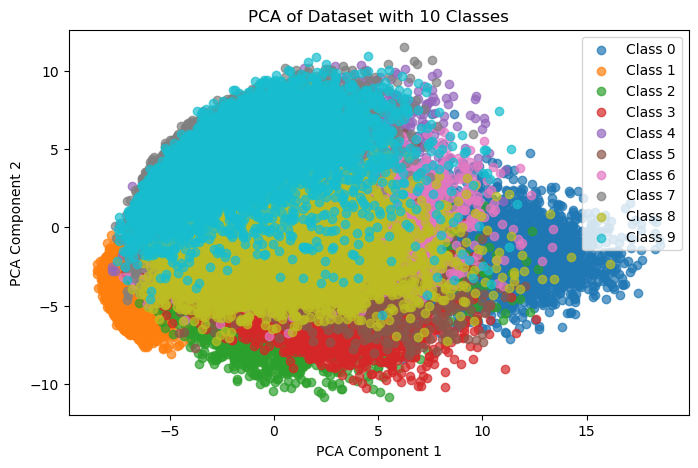

In [93]:
plt.figure(figsize=(8, 5))
for digit in range(10):  # Loop over 10 classes
    plt.scatter(x_train_pca[y_train == digit, 0], x_train_pca[y_train == digit, 1], label=f'Class {digit}', alpha=0.7)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Ensure unique labels
plt.legend(by_label.values(), by_label.keys())

plt.title('PCA of Dataset with 10 Classes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


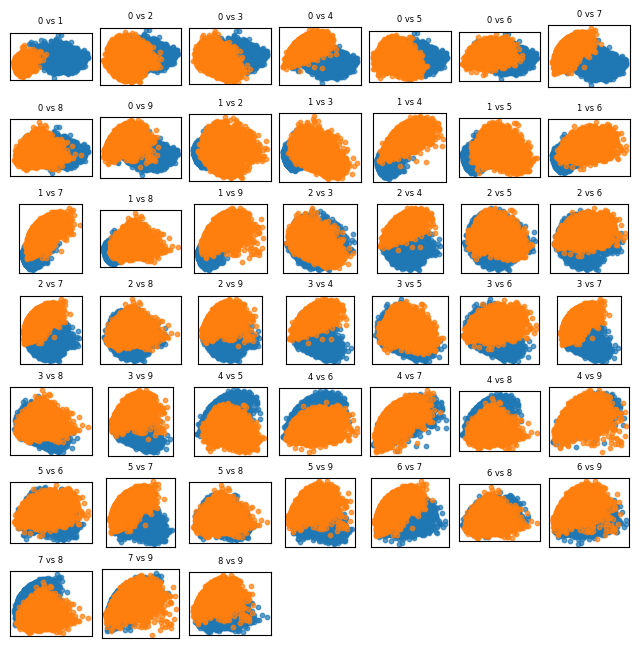

In [94]:
class_pairs = list(combinations(range(10), 2))

# Create subplots for all class pairs
fig, axes = plt.subplots(len(class_pairs) // 7 + (len(class_pairs) % 7 != 0), 7, figsize=(8, 8))

axes = axes.flatten()

for idx, (class1, class2) in enumerate(class_pairs):
    ax = axes[idx]
    
    # Plot data points for the two classes
    ax.scatter(x_train_pca[y_train == class1, 0], x_train_pca[y_train == class1, 1], alpha=0.7, s=10, label=f'Class {class1}')
    ax.scatter(x_train_pca[y_train == class2, 0], x_train_pca[y_train == class2, 1], alpha=0.7, s=10, label=f'Class {class2}')
    
    ax.set_title(f'{class1} vs {class2}', fontsize=6)
    ax.set_aspect('equal')  # Make each plot square-shaped
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove any empty subplots if number of plots is not a perfect multiple of columns
for idx in range(len(class_pairs), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for minimal white space
plt.subplots_adjust(wspace= 0.1, hspace=0.33)
plt.show()

* Why is PCA a good option to visualise data?
* Add plots to your report and discuss your observations.
* Which classes can be linearly separated?


In [95]:
def digit_pairs(digit1, digit2):
    cond = (y_train==digit1) + (y_train==digit2)
    binary_x_train = x_train[cond, :]
    binary_y_train = y_train[cond].astype(int)
    binary_y_train[binary_y_train == digit1] = -1
    binary_y_train[binary_y_train == digit2] = 1
    return binary_x_train, binary_y_train

In [96]:
binary_x_train, binary_y_train = digit_pairs(0, 1)

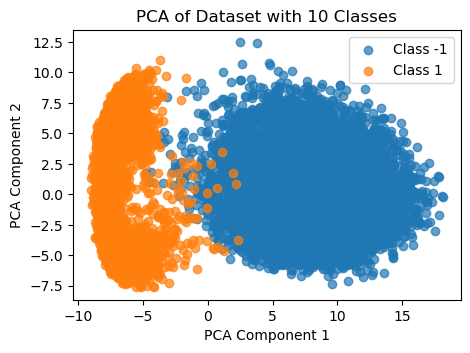

In [97]:
binary_X_pca = pca.fit_transform(binary_x_train)

plt.figure(figsize=(5, 3.5))
for digit in [-1, 1]:  # Loop over 10 classes
    plt.scatter(binary_X_pca[binary_y_train == digit, 0], binary_X_pca[binary_y_train == digit, 1], label=f'Class {digit}', alpha=0.7)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Ensure unique labels
plt.legend(by_label.values(), by_label.keys())

plt.title('PCA of Dataset with 10 Classes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Task 2. Perceptrons (10 points)

In [104]:
def predict(x, w, b):
    weighted_sum = np.dot(x, w)
    result = 1 if weighted_sum > b else -1
    return result

def optimize(x, y):
    iteration = 0
    error = np.inf
    m, n = x.shape
    w = np.random.uniform(-1, 1, n)
    b = np.random.uniform(-1, 1)
    learning_rate = 0.002
    while (iteration <= 1000) & (error > 1e-3):
        error = 0
        fp, fn = 0, 0
        predictions  = []
        for sample, target in zip(x, y):
            prediction = predict(sample, w, b)
            predictions.append(prediction)
            if prediction != target:
                if prediction > target:
                    fp += 1
                else:
                    fn += 1
                error = error + 1
                w = w + learning_rate*(target-prediction)*sample
                b = b + learning_rate*(target-prediction)

        iteration += 1        
        print("Iteration:", iteration, 'with error:', error, fp, fn)
    return predictions

binary_x_train, binary_y_train = digit_pairs(1, 7)
preds = optimize(binary_x_train, binary_y_train)

Iteration: 1 with error: 393 193 200
Iteration: 2 with error: 163 81 82
Iteration: 3 with error: 135 67 68
Iteration: 4 with error: 116 58 58
Iteration: 5 with error: 109 54 55
Iteration: 6 with error: 99 49 50
Iteration: 7 with error: 90 45 45
Iteration: 8 with error: 92 46 46
Iteration: 9 with error: 82 41 41
Iteration: 10 with error: 82 41 41
Iteration: 11 with error: 87 43 44
Iteration: 12 with error: 78 39 39
Iteration: 13 with error: 72 36 36
Iteration: 14 with error: 68 34 34
Iteration: 15 with error: 85 42 43
Iteration: 16 with error: 82 41 41
Iteration: 17 with error: 58 29 29
Iteration: 18 with error: 58 29 29
Iteration: 19 with error: 54 27 27
Iteration: 20 with error: 56 28 28
Iteration: 21 with error: 56 28 28
Iteration: 22 with error: 55 27 28
Iteration: 23 with error: 68 34 34
Iteration: 24 with error: 56 28 28
Iteration: 25 with error: 53 27 26
Iteration: 26 with error: 59 29 30
Iteration: 27 with error: 50 25 25
Iteration: 28 with error: 40 20 20
Iteration: 29 with err

In [32]:
for i in zip(preds, binary_y_train):
    if i[0] != i[1]:
        print(i)
print(len(preds))

12665


In [187]:
digit = binary_x_train[8].reshape(28, 28)

In [197]:
binary_y_train[:6]

array([-1,  1,  1,  1,  1, -1])

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def print_digit(sample_no):
    digit = sample_no.reshape(28, 28)

    plt.imshow(digit, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide the axes
    plt.show()

In [33]:
sorted_labels = np.argsort(y_train)
x_train_sorted = x_train[sorted_labels]

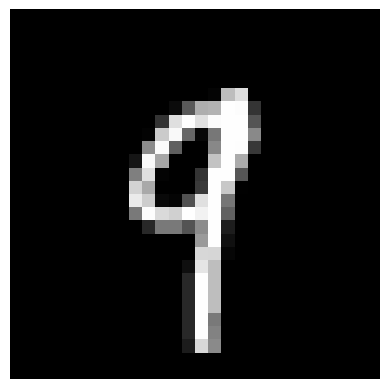

In [49]:
print_digit(x_train_sorted[59999])